In [1]:
# Data Manipulation Libraries
import pandas as pd 
import numpy as np 

# Data Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning Libraries

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc


In [2]:
df=pd.read_csv('D:\mohamed Orabi\Data set\credit_customers .csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_15244\1882433596.py:1: SyntaxWarning: invalid escape sequence '\m'
  df=pd.read_csv('D:\mohamed Orabi\Data set\credit_customers .csv')


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,NaN,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         909 non-null    object
 1   duration                1000 non-null   int64 
 2   credit_history          961 non-null    object
 3   purpose                 957 non-null    object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          987 non-null    object
 6   employment              987 non-null    object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      942 non-null    object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 931 non-null    object
 15  exist

In [4]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [5]:
df.isnull().sum()


checking_status           91
duration                   0
credit_history            39
purpose                   43
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

# EDA


In [6]:
categorical_data=df.select_dtypes(include='object')

numerical_data=df.select_dtypes(include='int64')


C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_15244\6844258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='Set1')
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_15244\6844258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='Set1')
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_15244\6844258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],palette='Set1')
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_15244\6844258.py:3: FutureWarning: 

Passing `palette` wi

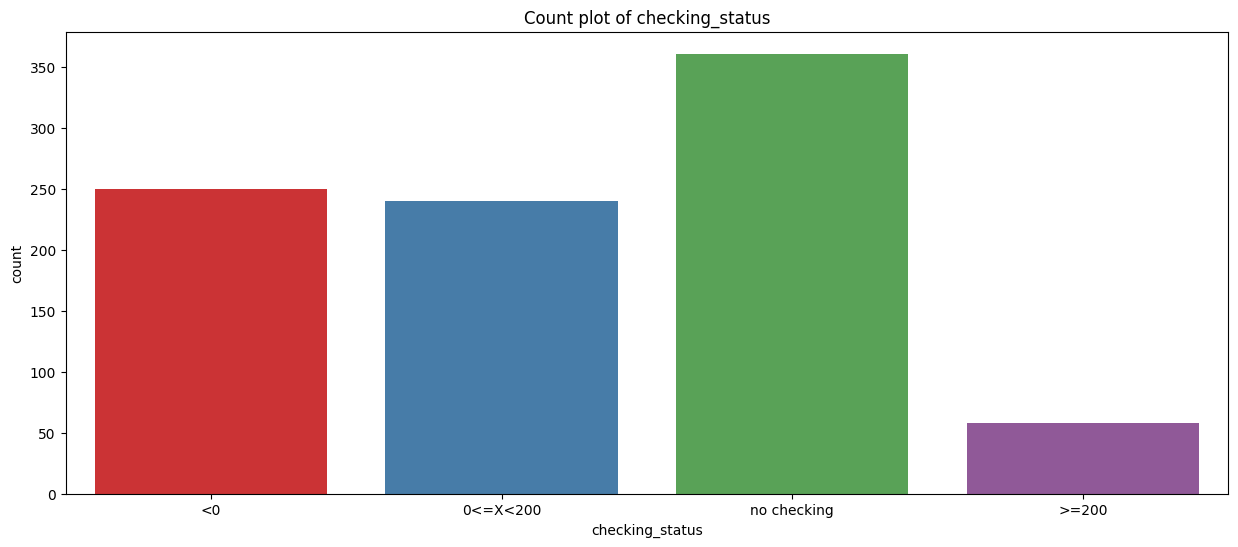

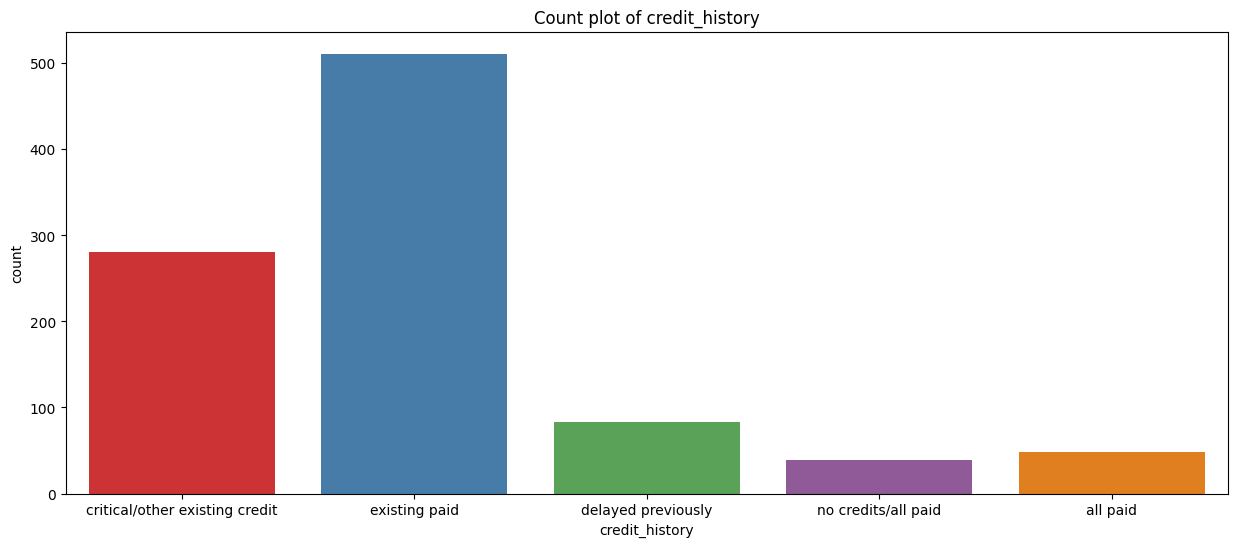

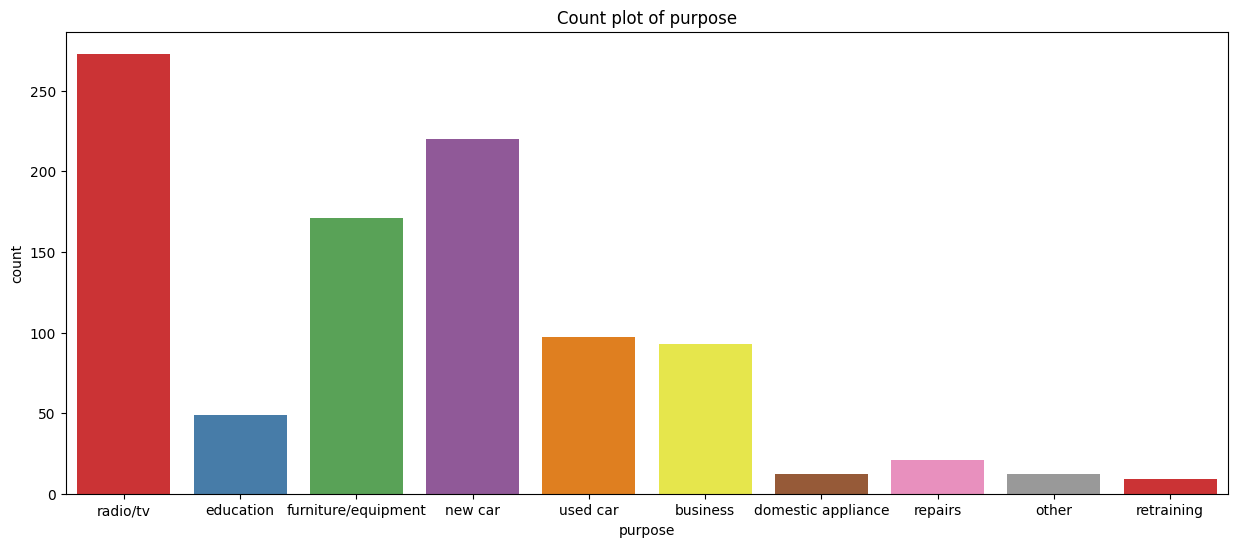

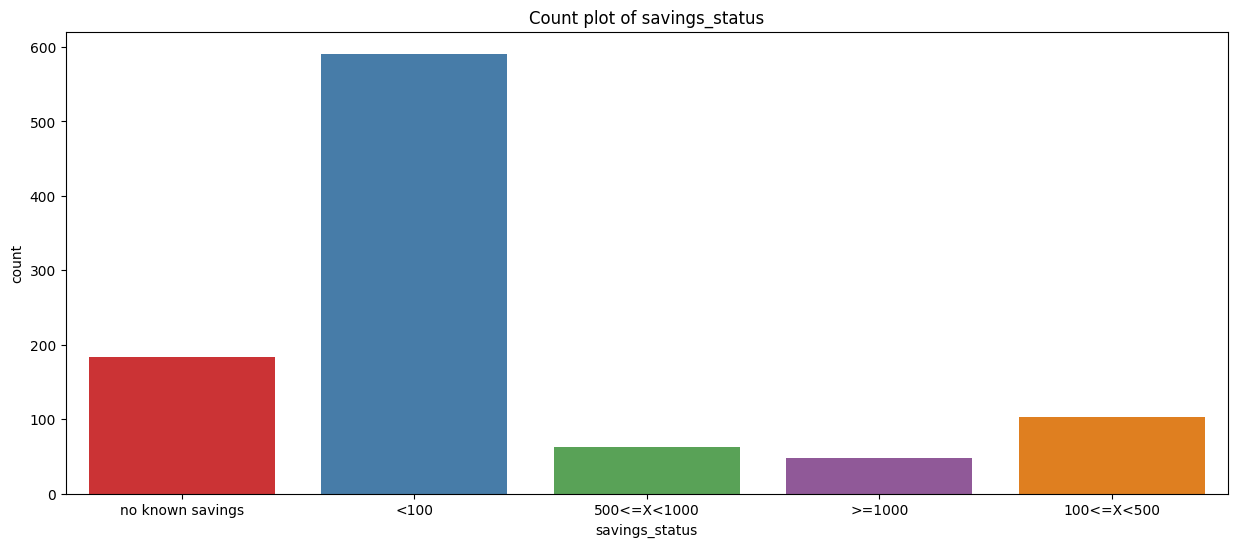

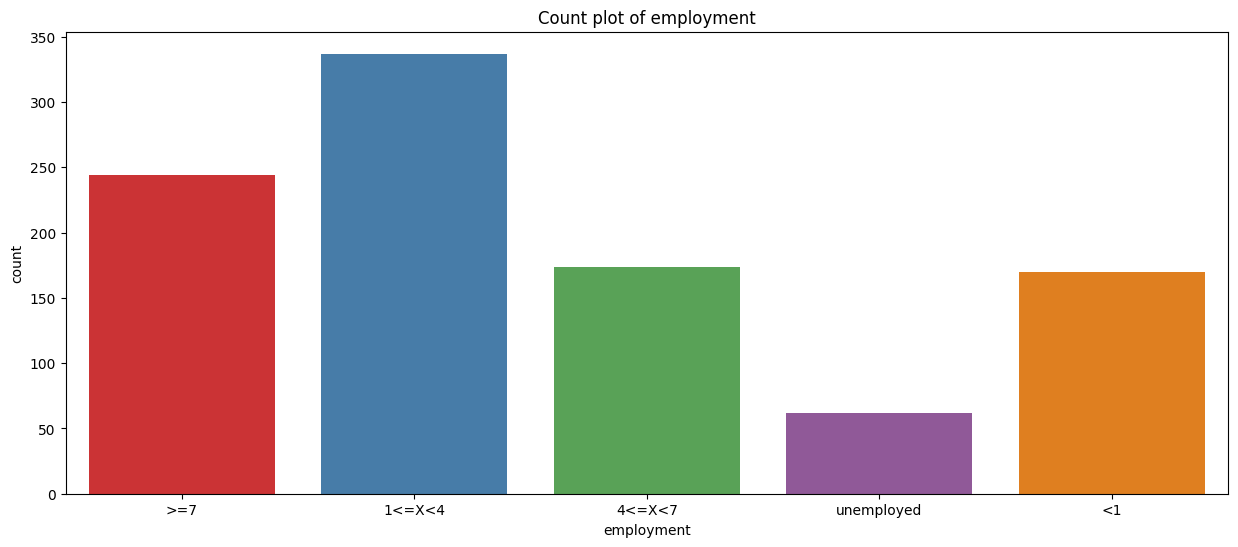

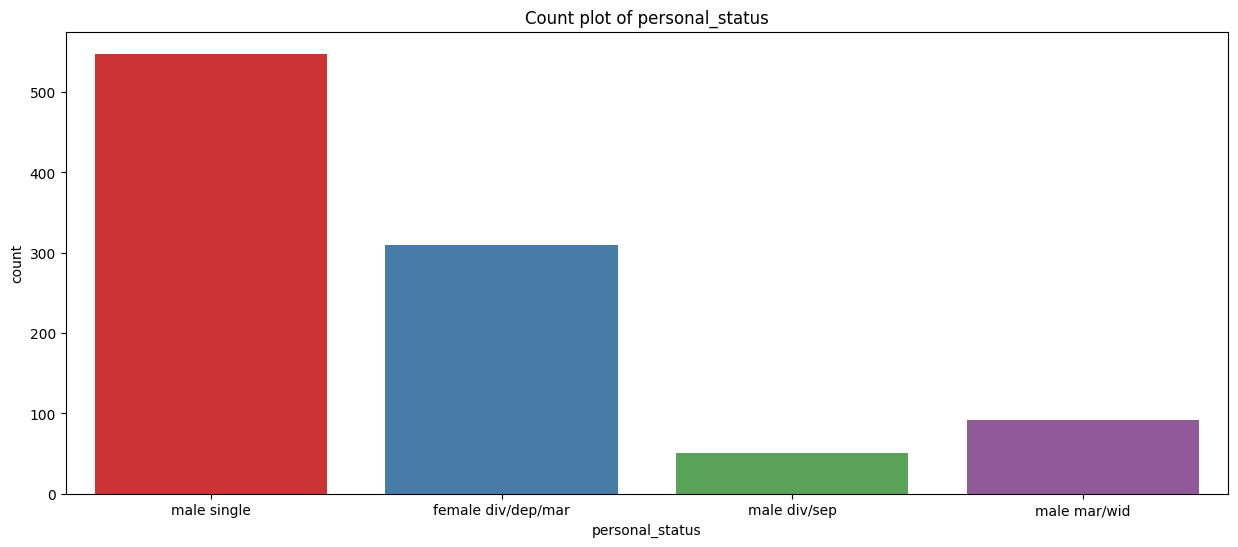

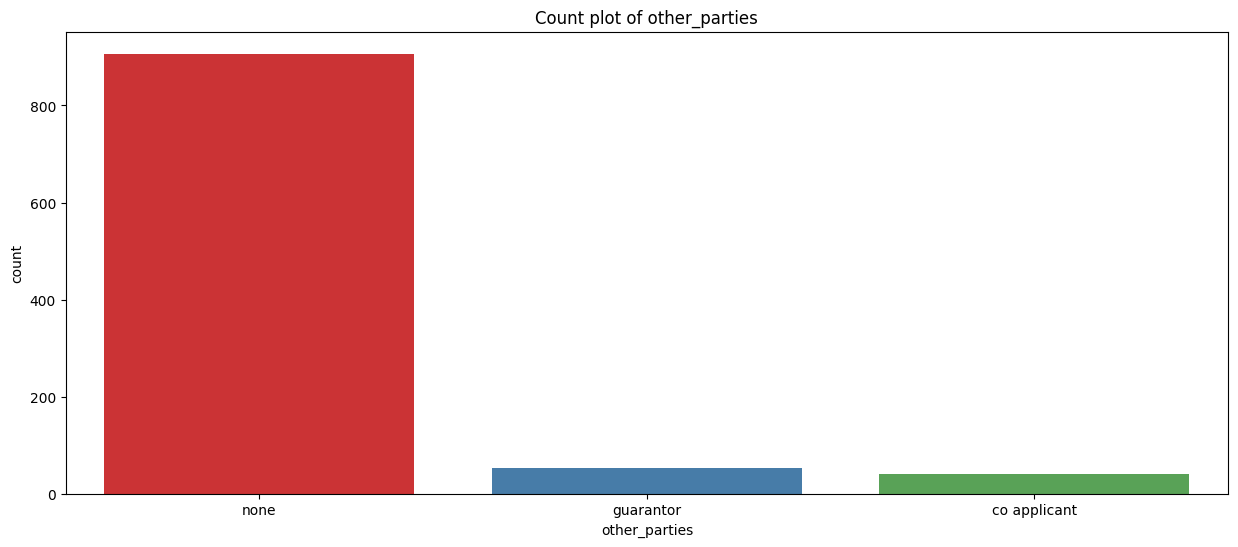

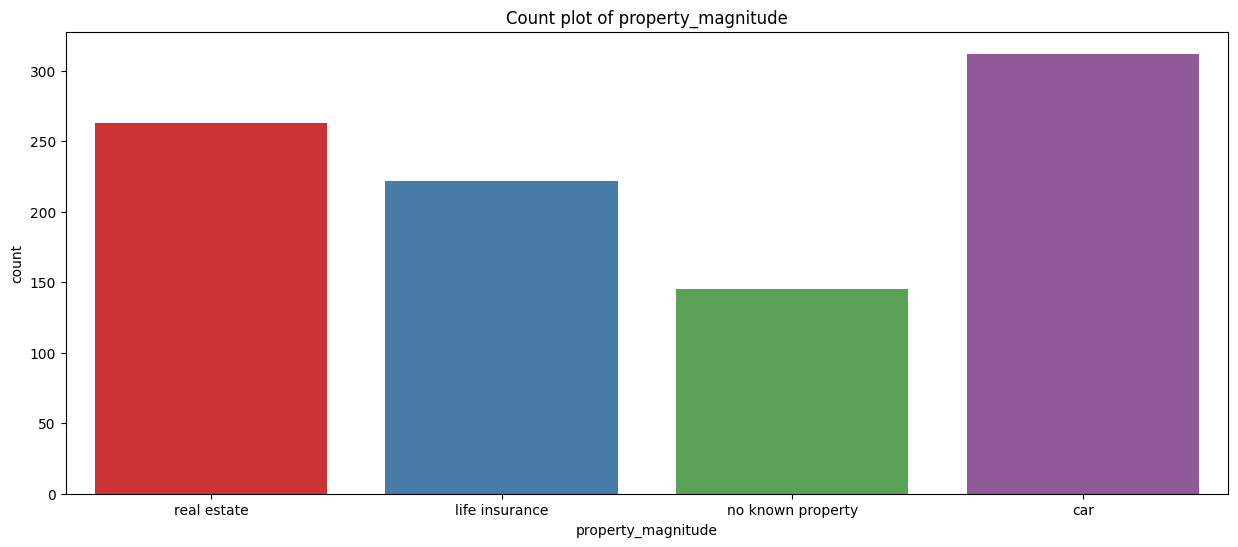

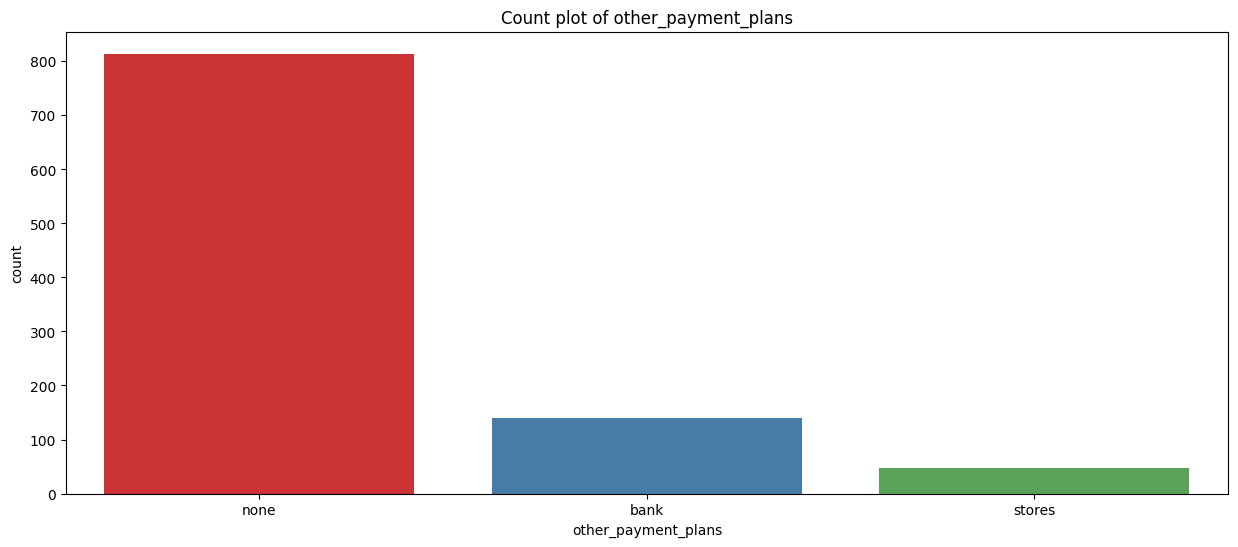

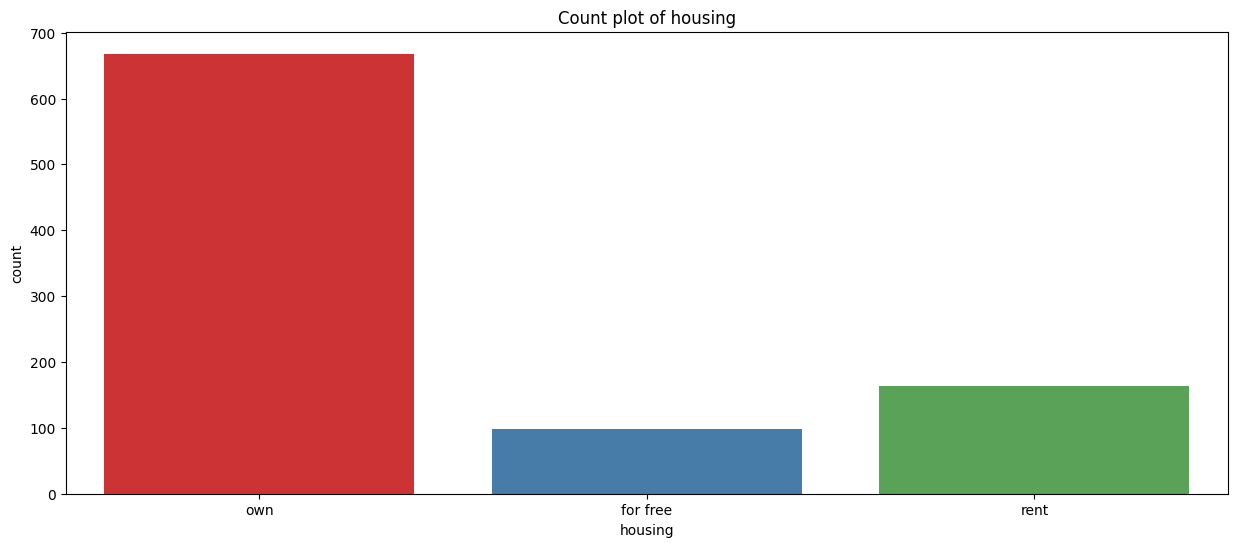

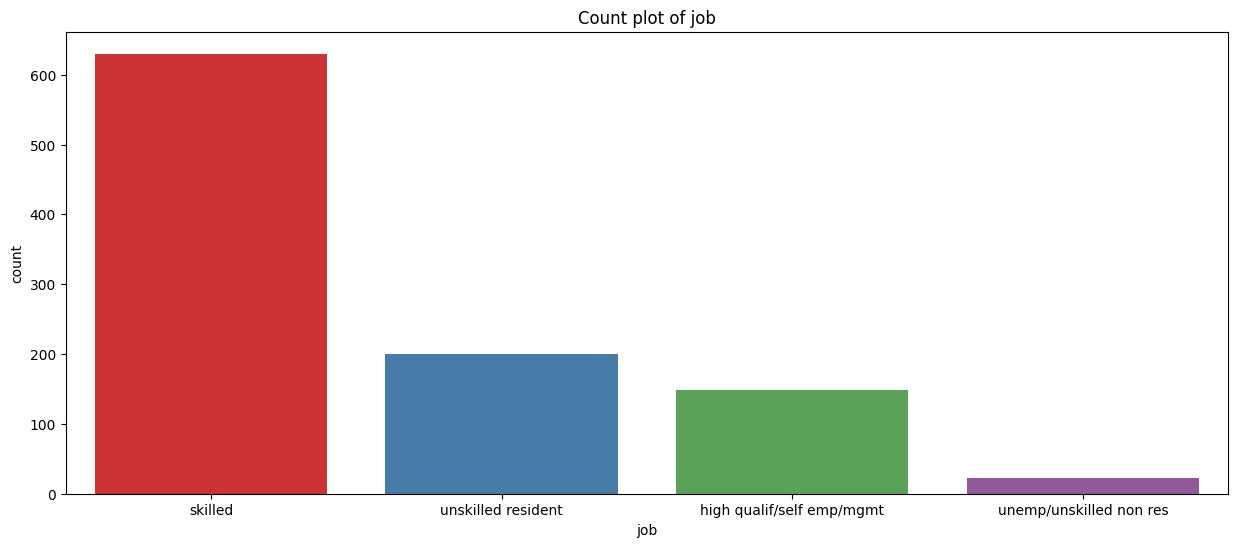

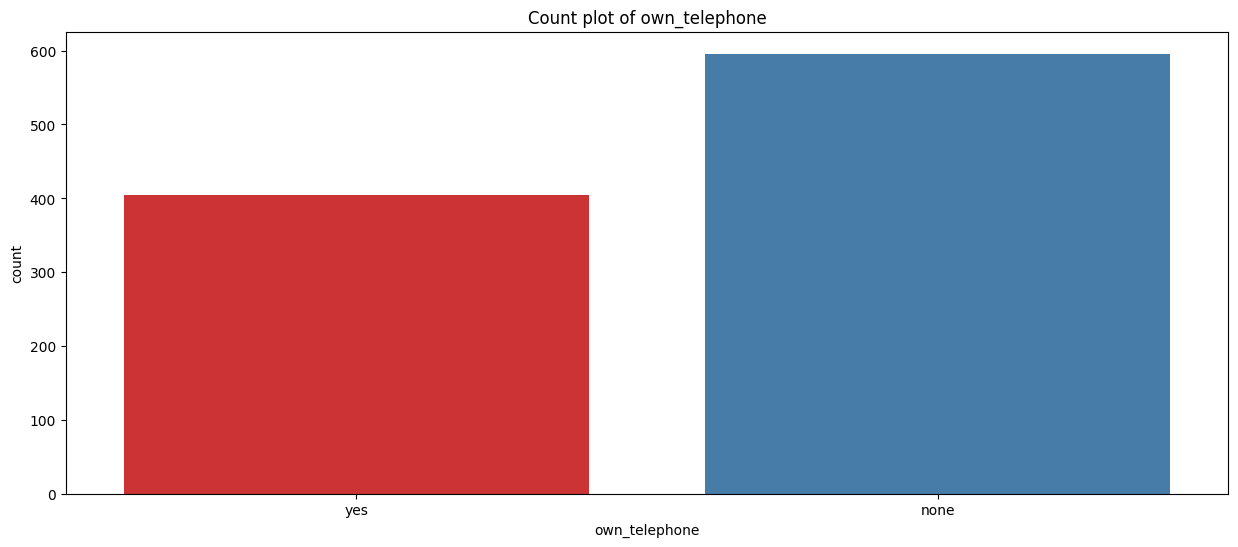

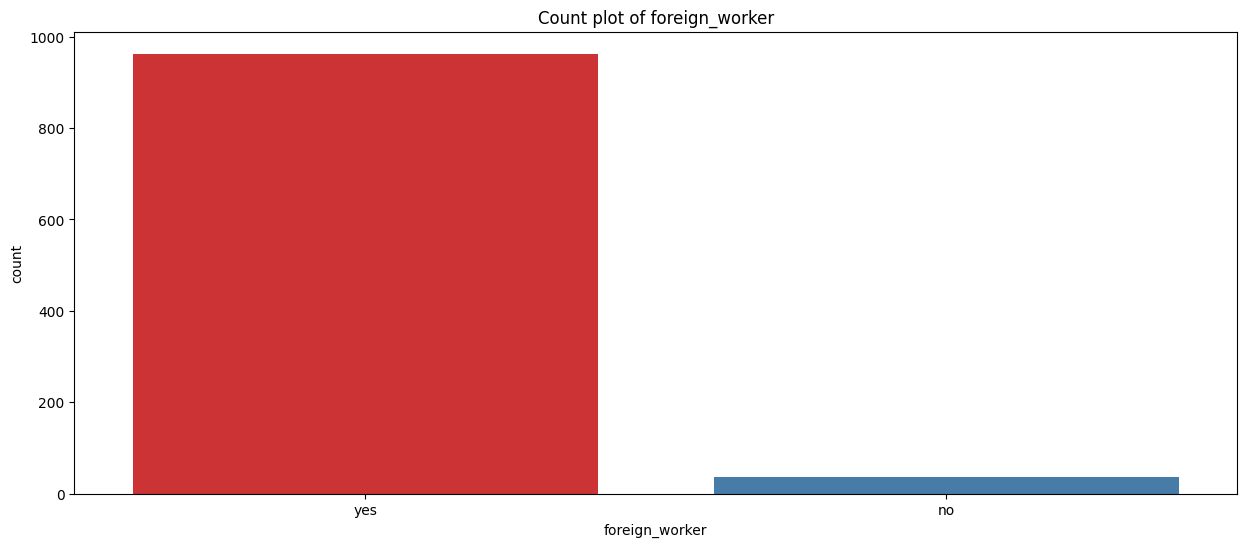

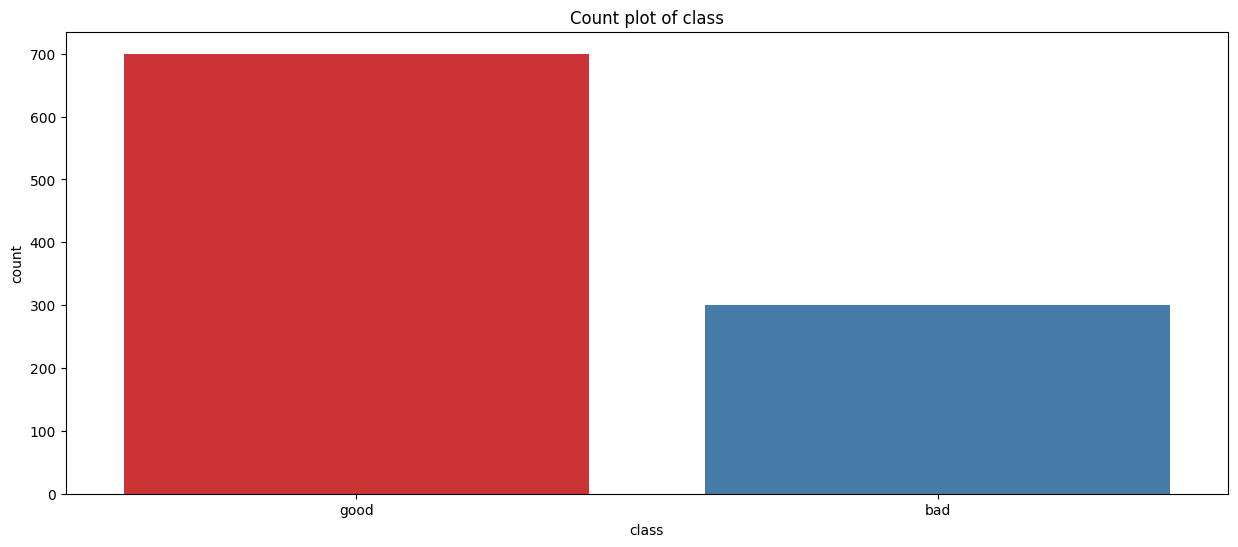

In [7]:
for col in categorical_data.columns:
    fig,ax=plt.subplots(figsize=(15,6))
    sns.countplot(x=df[col],palette='Set1')
    plt.title(f"Count plot of {col}")
plt.show()

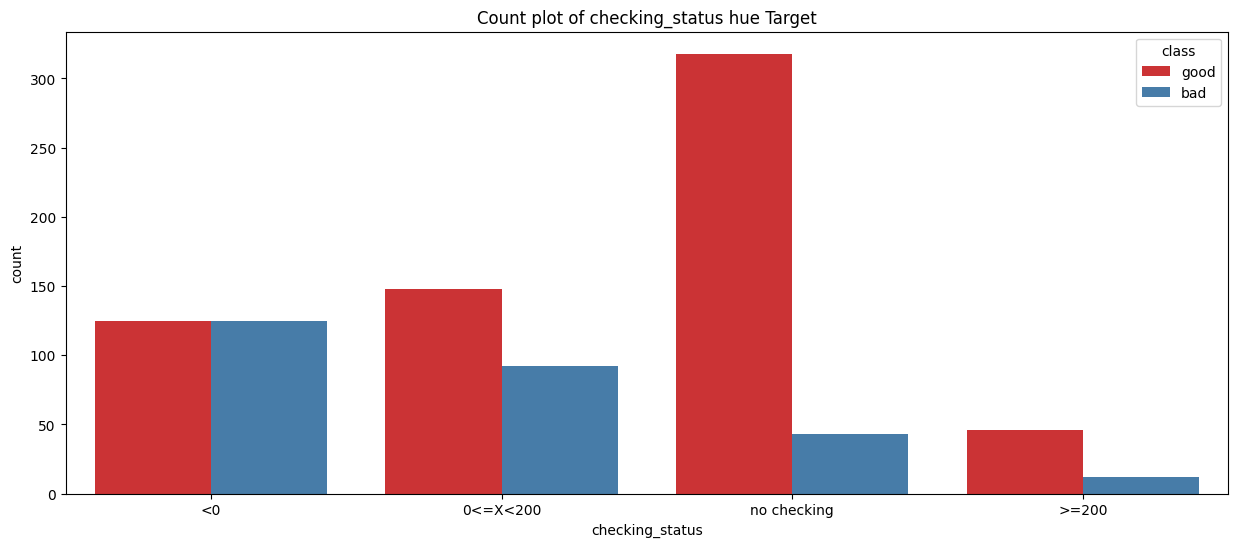

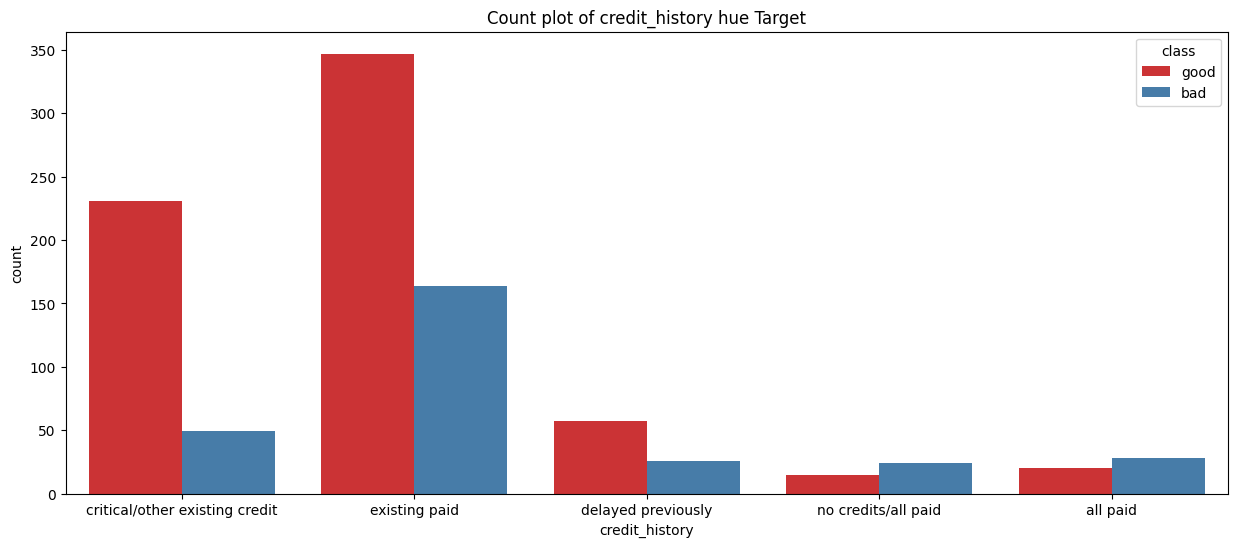

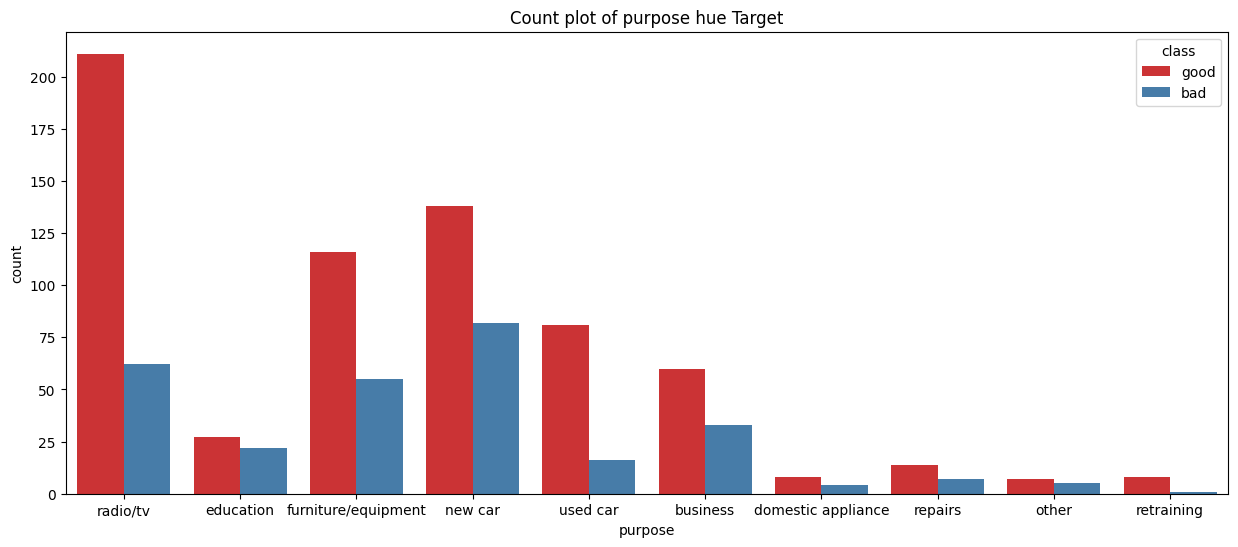

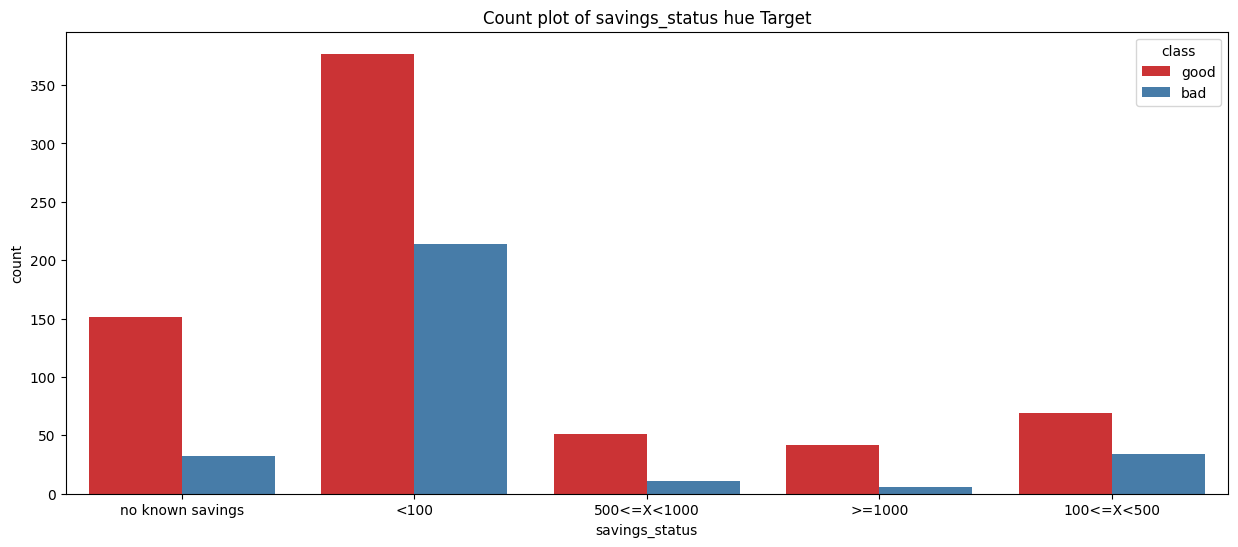

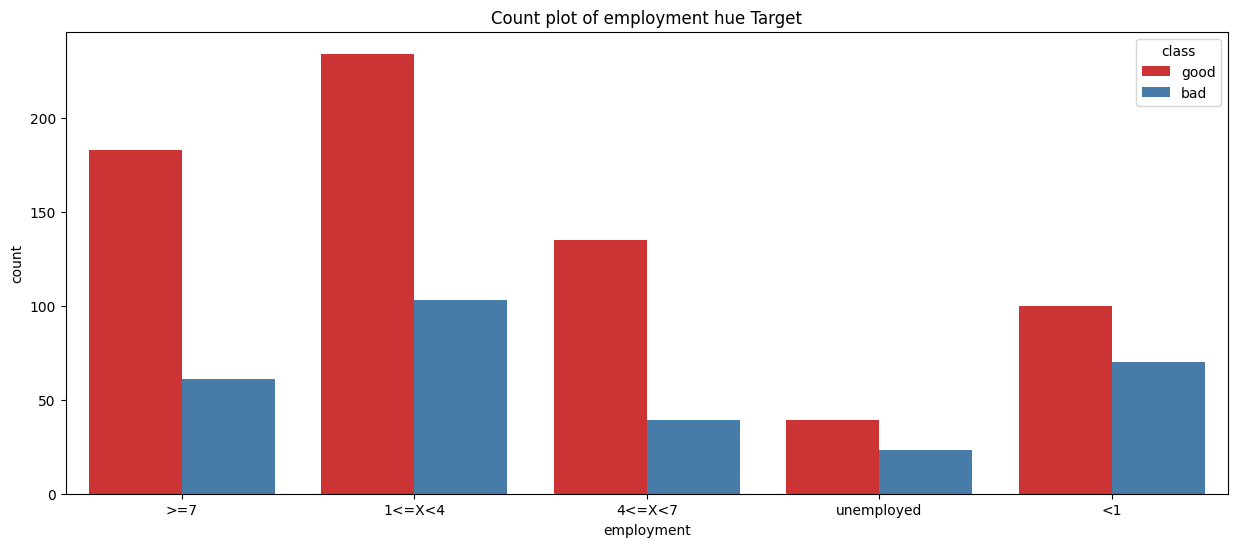

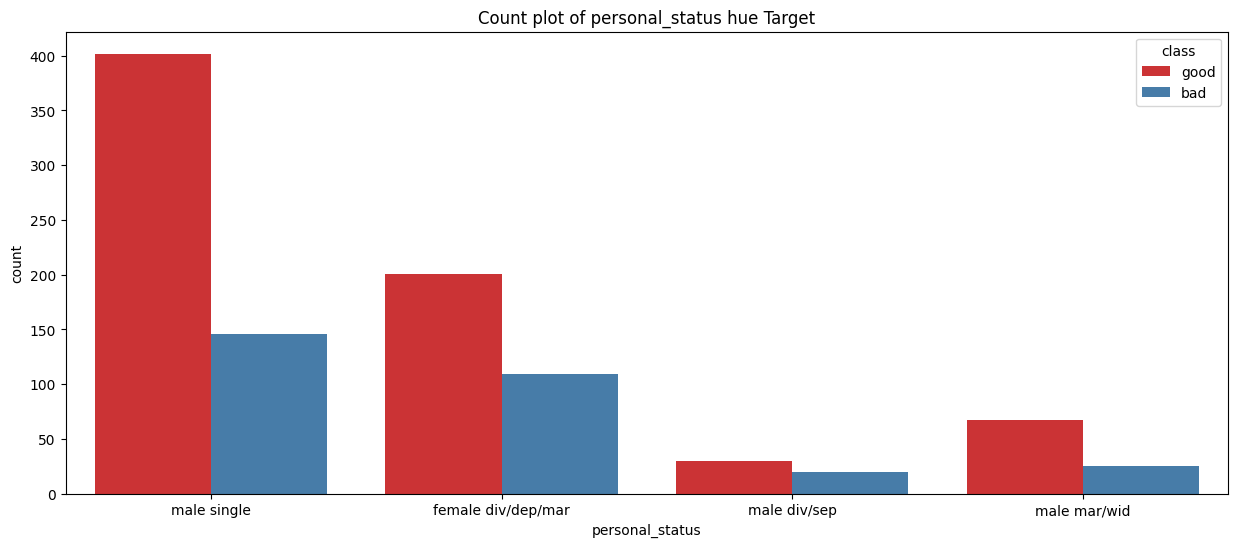

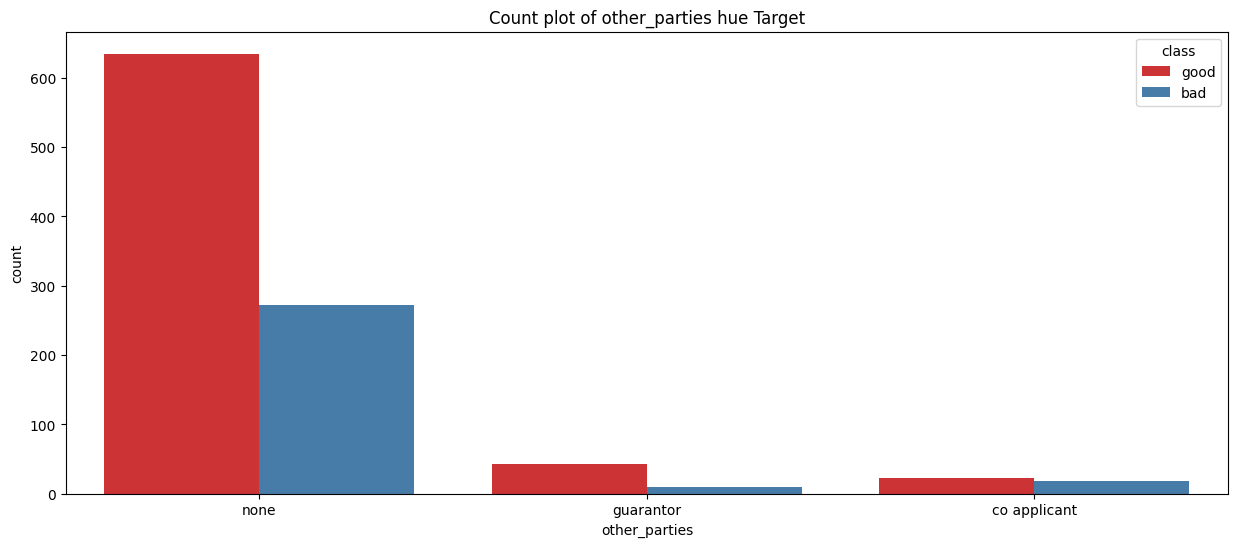

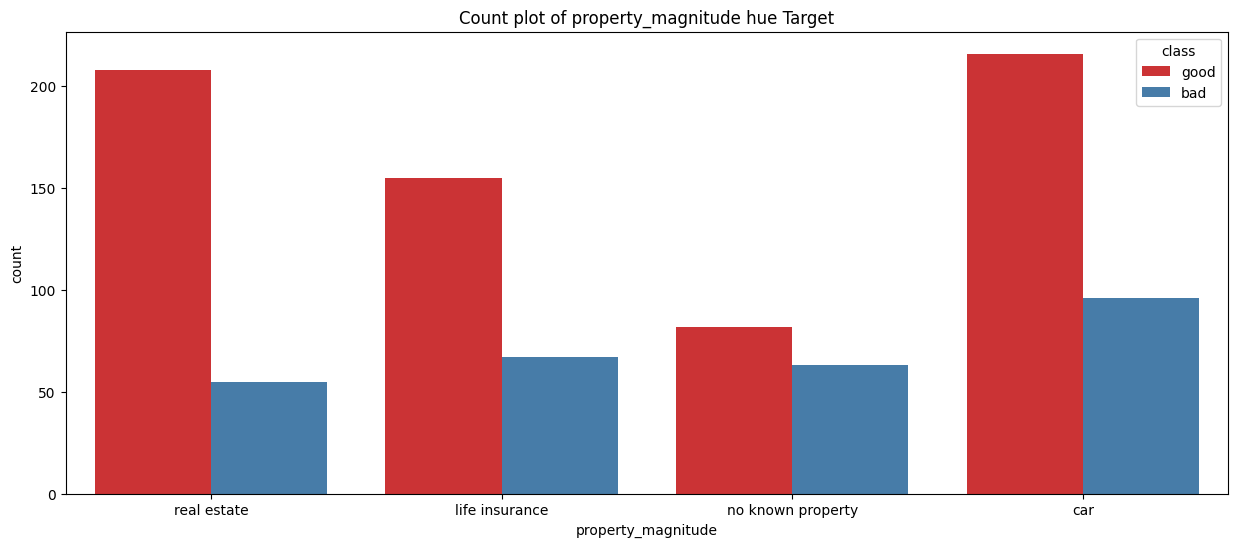

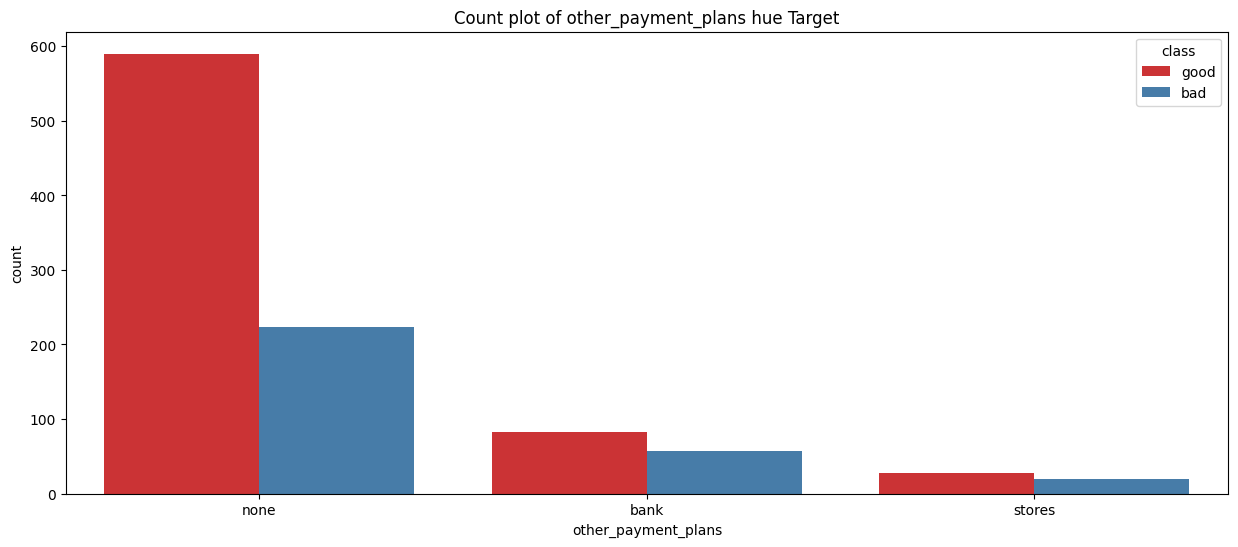

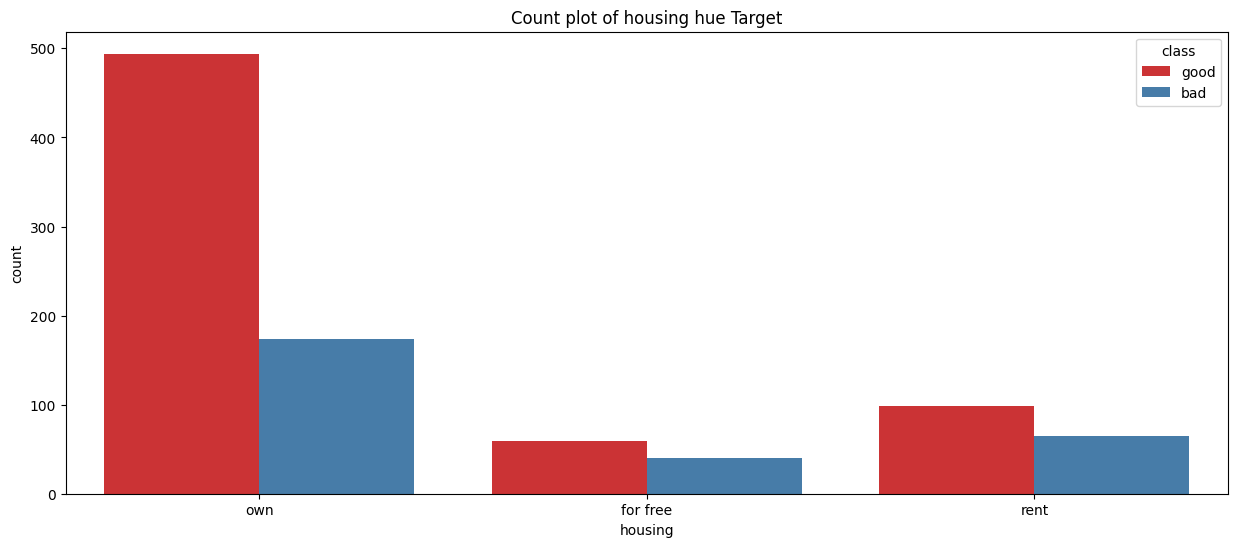

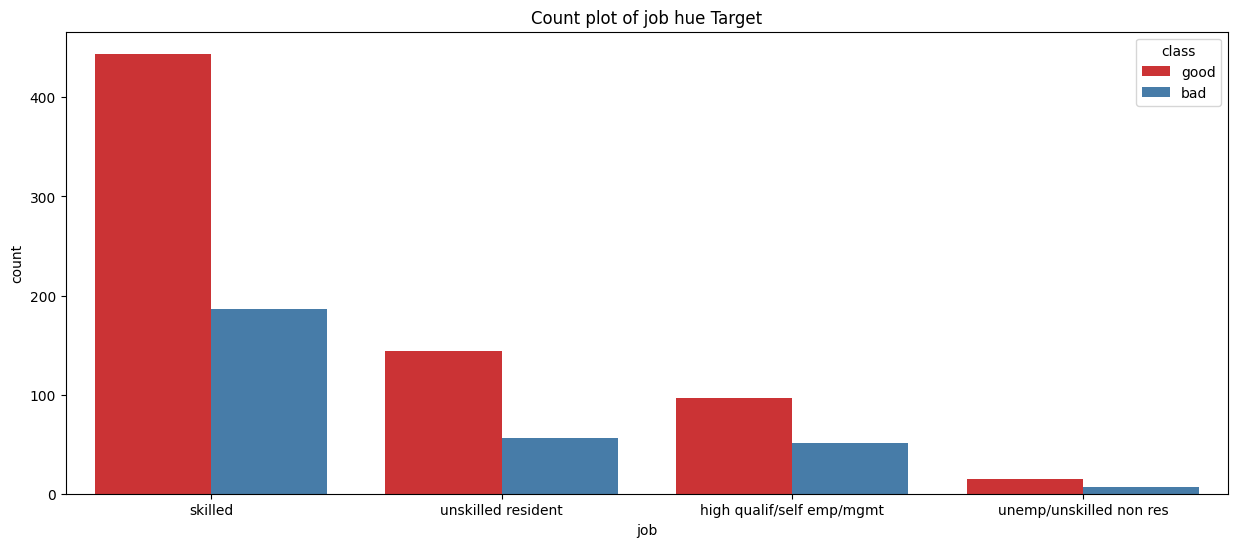

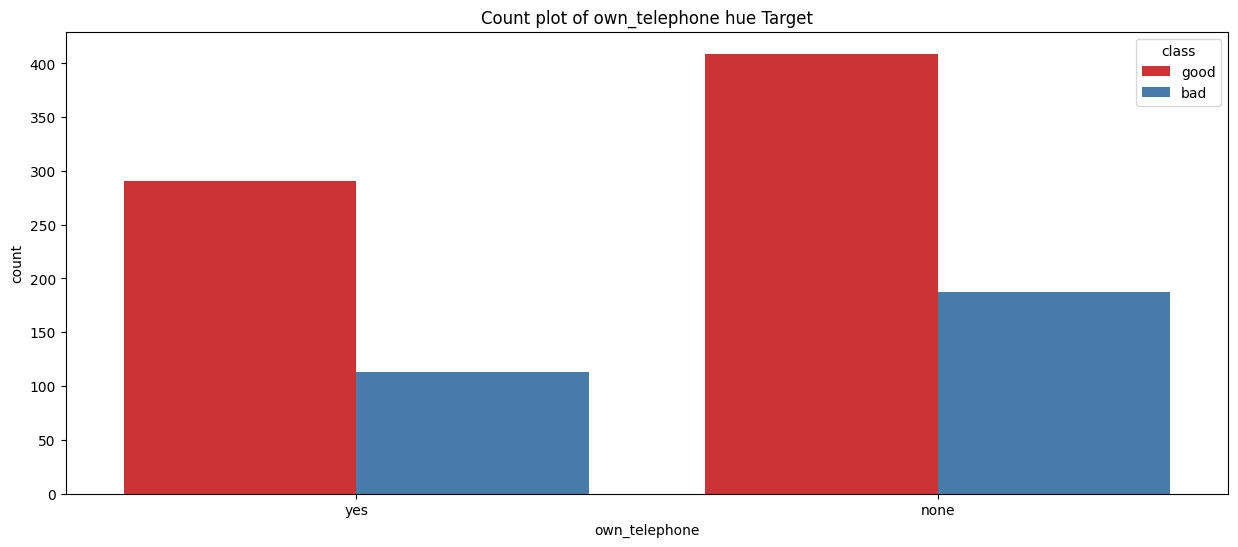

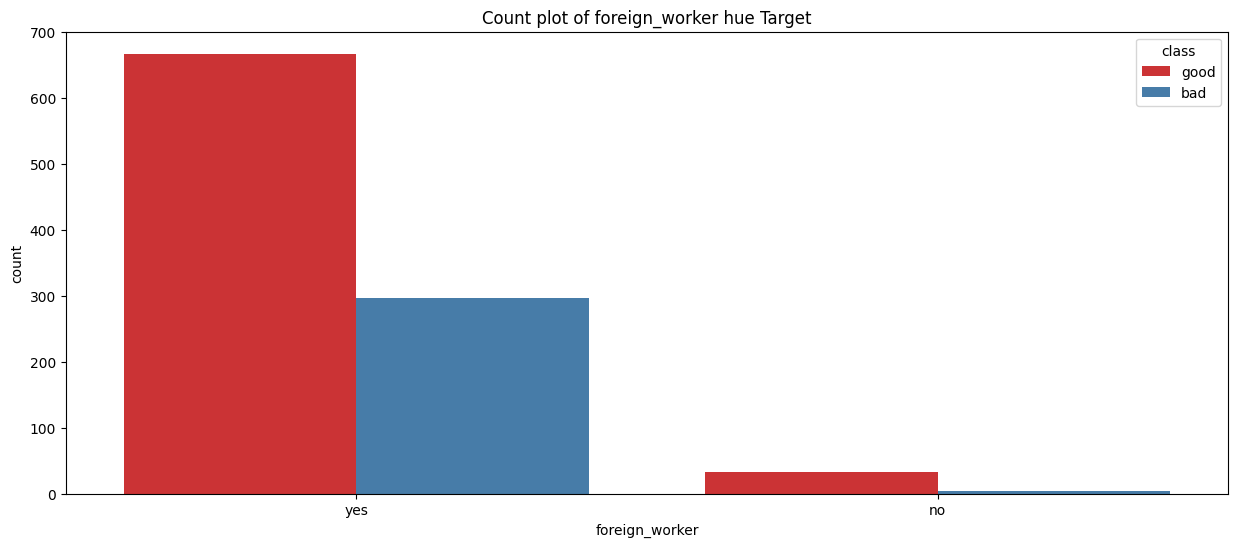

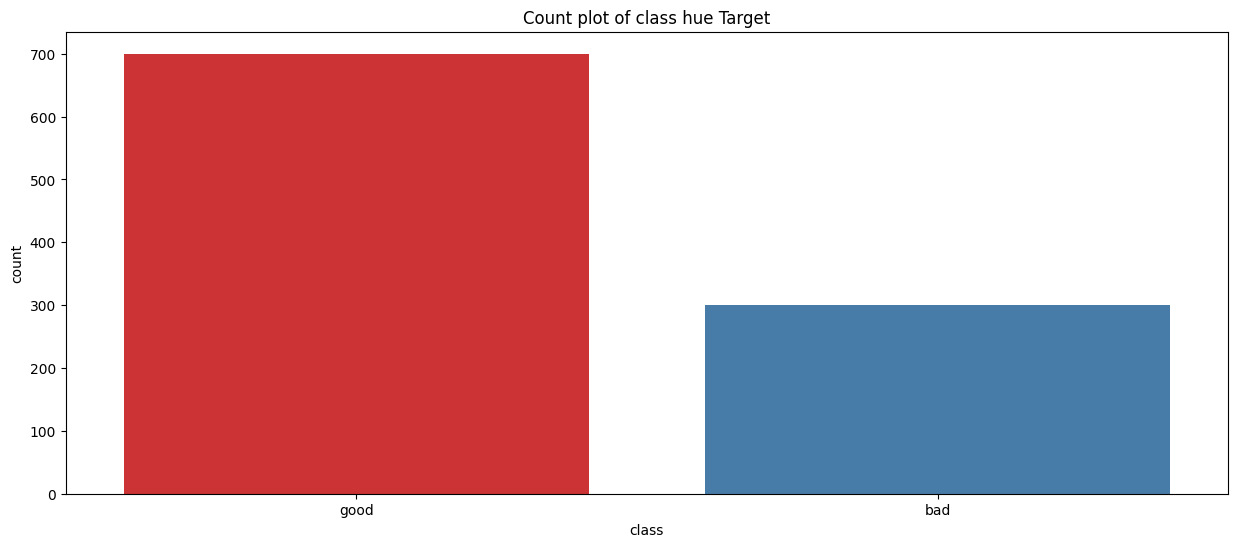

In [8]:
for col in categorical_data.columns:
    fig,ax=plt.subplots(figsize=(15,6))
    sns.countplot(x=df[col],palette='Set1',hue=df['class'])
    plt.title(f"Count plot of {col} hue Target")
plt.show()

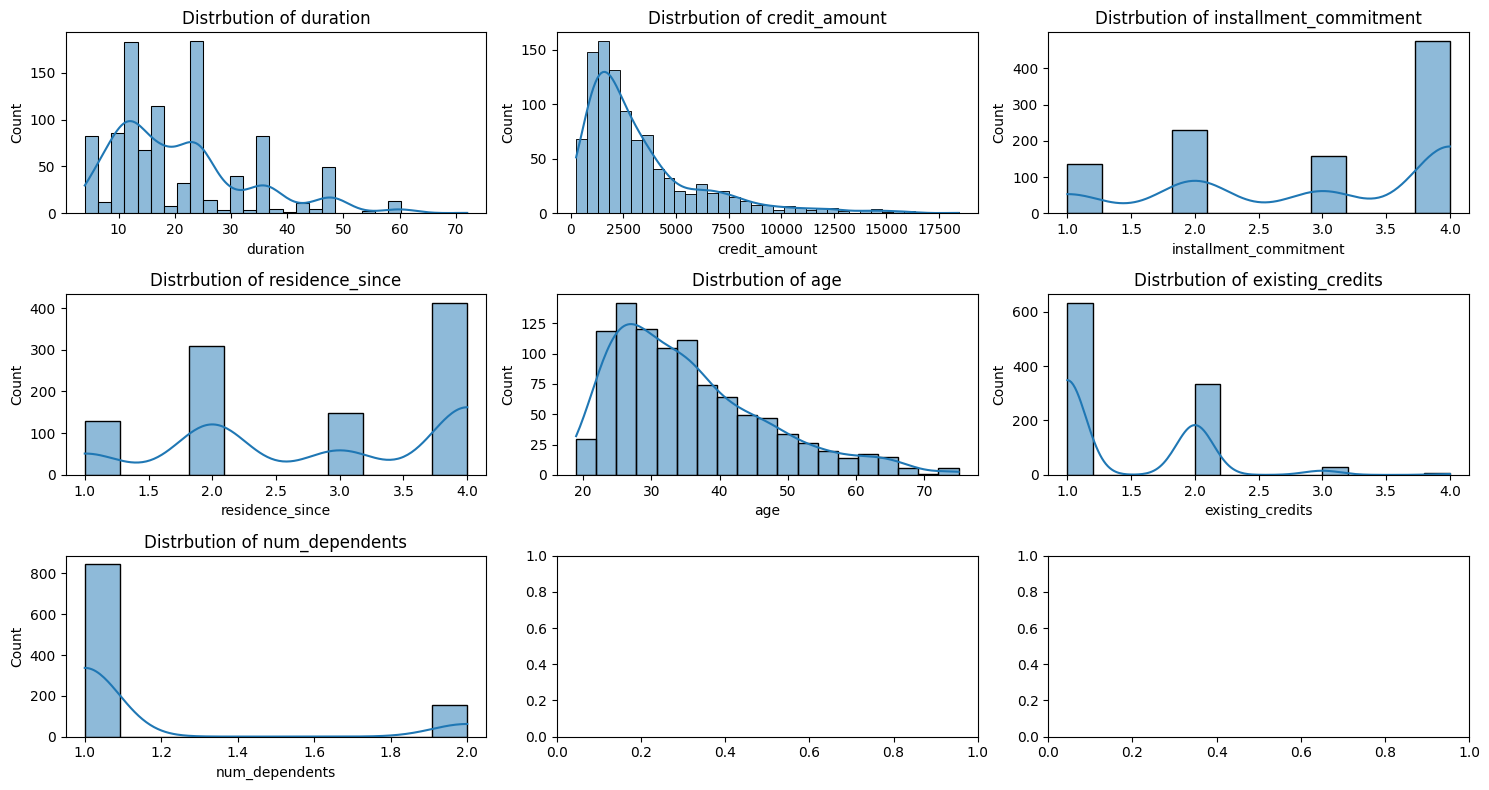

In [9]:
fig,ax=plt.subplots(3,3,figsize=(15,8))
for i,col in enumerate(numerical_data):
    axs=ax[i//3,i%3]
    sns.histplot(df[col],ax=axs,kde=True)
    axs.set_title(f"Distrbution of {col}")

plt.tight_layout()
plt.show()


### Handel missing values 

In [10]:
df.isnull().sum()

checking_status           91
duration                   0
credit_history            39
purpose                   43
credit_amount              0
savings_status            13
employment                13
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude        58
age                        0
other_payment_plans        0
housing                   69
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

In [11]:
col_with_missing=['checking_status','credit_history',"purpose","savings_status","employment","property_magnitude","housing"]

most_freq_value=df[col_with_missing].mode().iloc[0]

most_freq_value

checking_status         no checking
credit_history        existing paid
purpose                    radio/tv
savings_status                 <100
employment                   1<=X<4
property_magnitude              car
housing                         own
Name: 0, dtype: object

In [12]:
for col,val in zip(col_with_missing,most_freq_value):
    df[col].fillna(val,inplace=True)

df.isnull().sum()

C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_15244\2989749827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(val,inplace=True)


checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

### Let's go to check the outliers

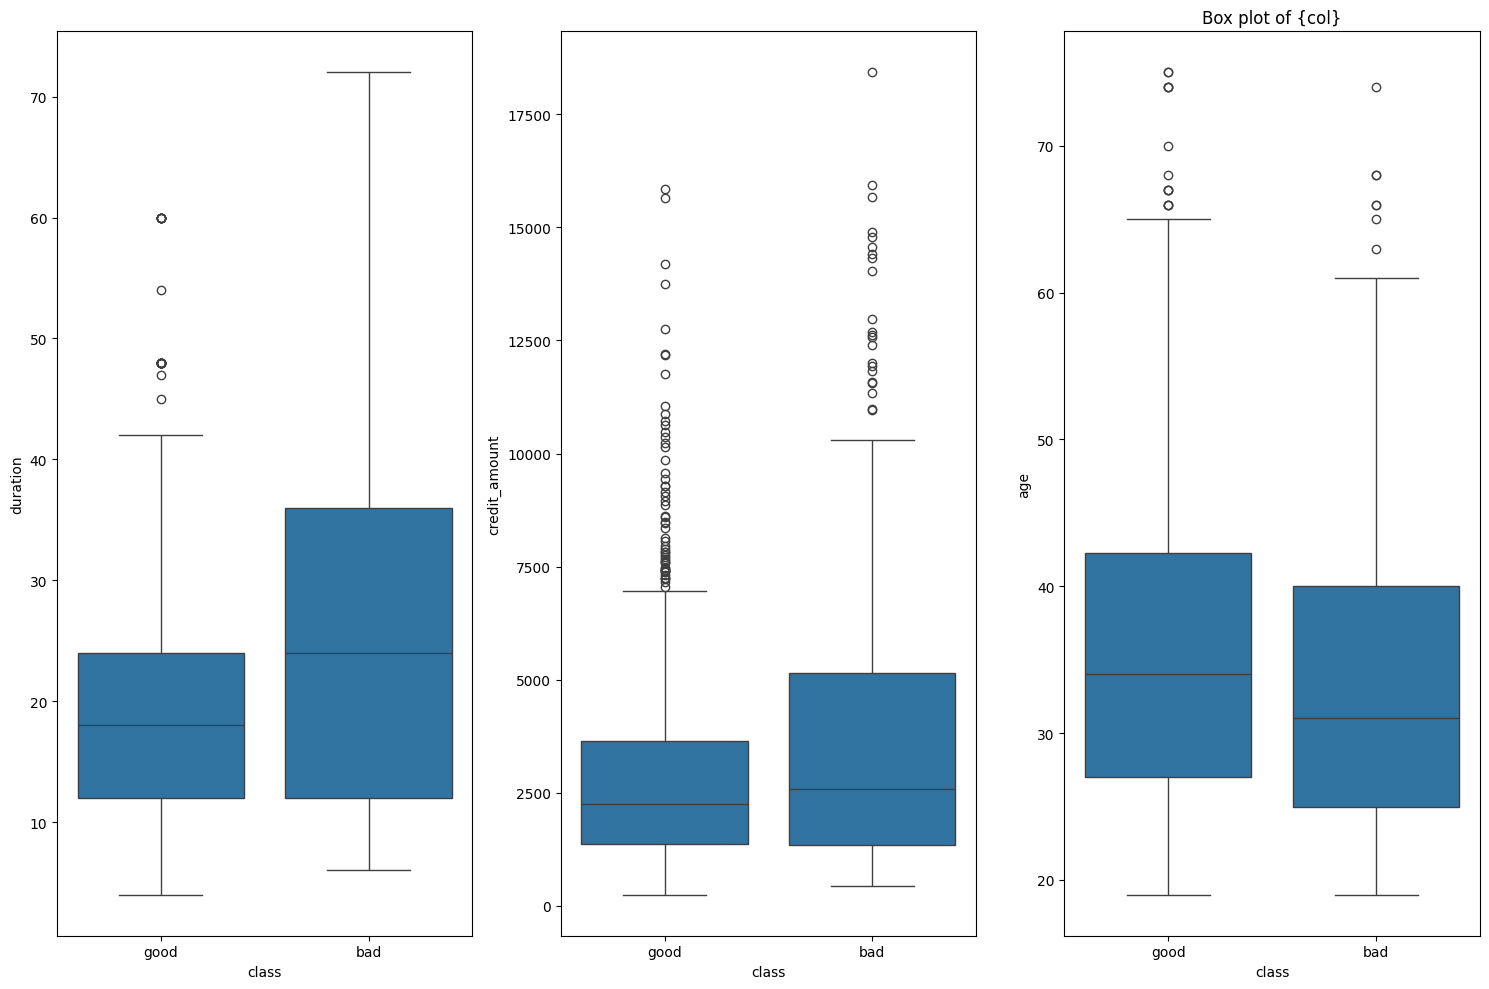

In [13]:
num_col=["duration",'credit_amount','age']

fig,ax=plt.subplots(1,3,figsize=(15,10))

for i,col in enumerate(num_col):
    
    axs=ax[i%3]
    
    sns.boxplot(y=df[col],x=df['class'],ax=axs)
    
    plt.title("Box plot of {col}")

plt.tight_layout()
plt.show()

In [14]:
for col in num_col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    
    Threshold=1.5
    IQR=Q3-Q1
    
    min=Q1-Threshold*IQR
    max=Q3+Threshold*IQR
    
    outlier_mask=((df[col]<min)|(df[col]>max))
    df=df[~outlier_mask]

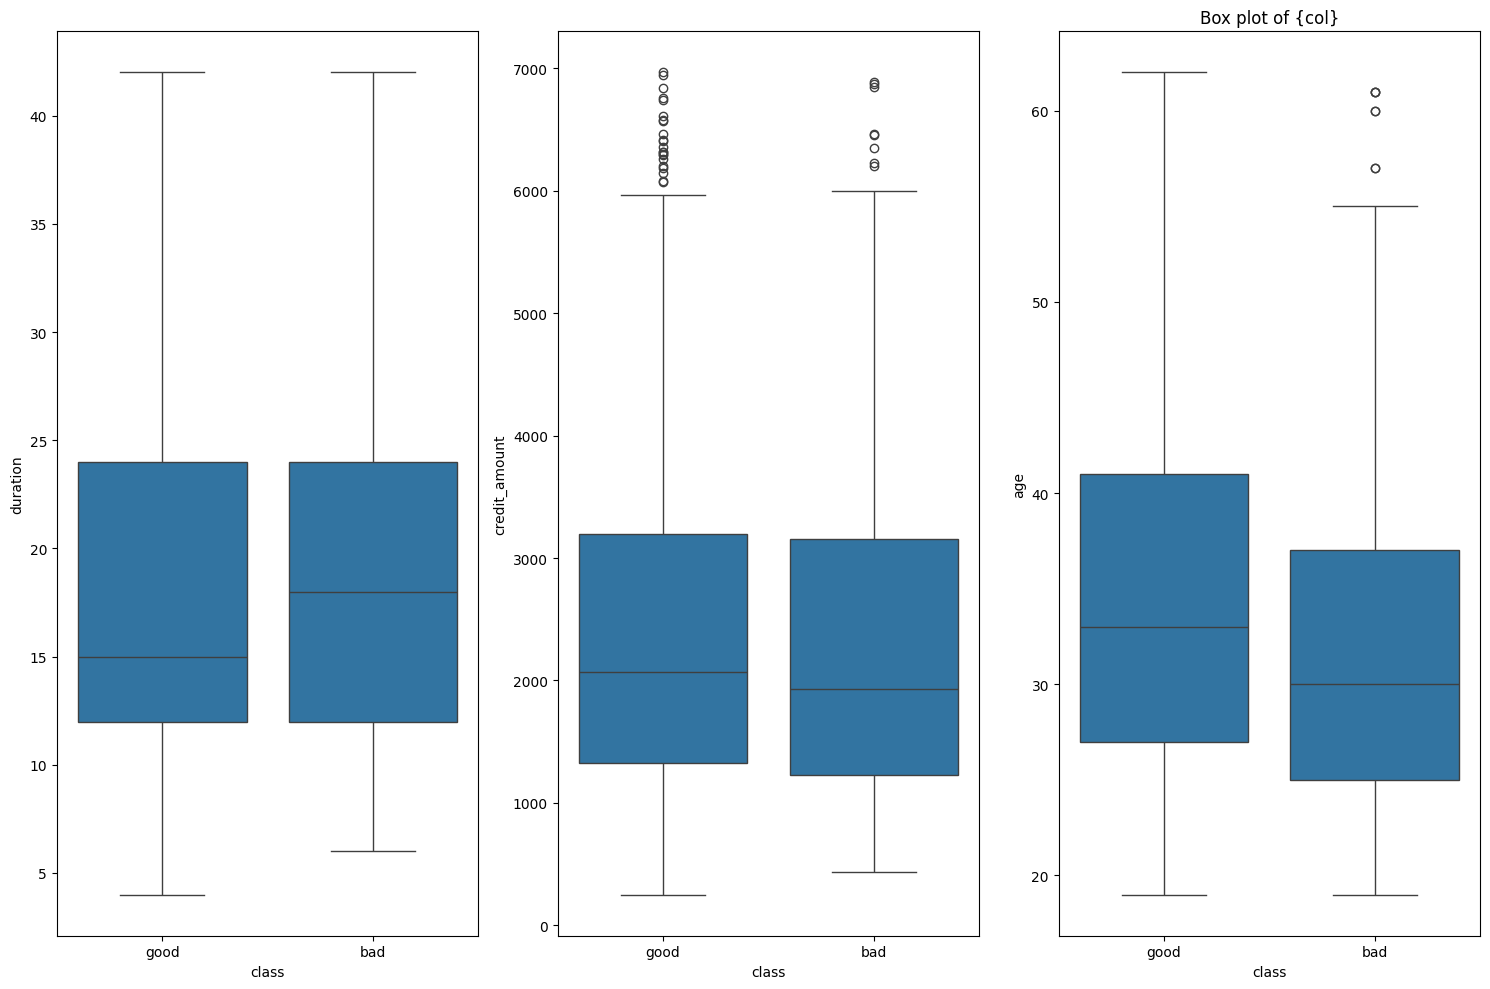

In [15]:
num_col=["duration",'credit_amount','age']

fig,ax=plt.subplots(1,3,figsize=(15,10))

for i,col in enumerate(num_col):
    
    axs=ax[i%3]
    
    sns.boxplot(y=df[col],x=df['class'],ax=axs)
    
    plt.title("Box plot of {col}")

plt.tight_layout()
plt.show()

## Encoding Time👌

In [16]:
categorical_data

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes,good
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes,bad
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes,good
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes,good
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,existing paid,NaN,<100,4<=X<7,female div/dep/mar,none,real estate,none,own,unskilled resident,none,yes,good
996,<0,existing paid,used car,<100,1<=X<4,male div/sep,none,life insurance,none,own,high qualif/self emp/mgmt,yes,yes,good
997,no checking,existing paid,radio/tv,<100,>=7,male single,none,car,none,own,skilled,none,yes,good
998,<0,existing paid,radio/tv,<100,1<=X<4,male single,none,no known property,none,for free,skilled,yes,yes,bad


In [17]:
hot=['checking_status',"credit_history","purpose","savings_status","employment","personal_status","other_payment_plans"]

labele=['other_parties','property_magnitude',"housing","job","own_telephone","foreign_worker",'class']



In [18]:
label=LabelEncoder()

for col in labele:
    df[col]=label.fit_transform(df[col])
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,2,...,3,49,none,1,1,3,2,0,1,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,2,...,2,53,none,0,2,1,2,0,1,0
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,2,...,1,53,none,1,1,1,1,0,1,1
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,2,...,0,35,none,2,1,0,1,1,1,1
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,2,...,3,61,none,1,1,3,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,<0,36,existing paid,radio/tv,3959,<100,unemployed,4,male single,2,...,1,30,none,1,1,0,1,1,1,1
994,no checking,12,existing paid,radio/tv,2390,no known savings,>=7,4,male single,2,...,0,50,none,1,1,1,1,1,1,1
995,no checking,12,existing paid,radio/tv,1736,<100,4<=X<7,3,female div/dep/mar,2,...,3,31,none,1,1,3,1,0,1,1
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,2,...,1,40,none,1,1,0,1,1,1,1


In [19]:
hot_col=['checking_status',"credit_history","purpose","savings_status","employment","personal_status","other_payment_plans"]

hot=pd.get_dummies(df[['checking_status',"credit_history","purpose","savings_status","employment","personal_status","other_payment_plans"]])

df=pd.concat([df,hot],axis=1)

df.drop(['checking_status',"credit_history","purpose","savings_status","employment","personal_status","other_payment_plans"],axis=1,inplace=True)

df

,duration,credit_amount,installment_commitment,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,...,employment_<1,employment_>=7,employment_unemployed,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores
2,12,2096,2,2,3,3,49,1,1,3,...,False,False,False,False,False,False,True,False,True,False
4,24,4870,3,2,4,2,53,0,2,1,...,False,False,False,False,False,False,True,False,True,False
6,24,2835,3,2,4,1,53,1,1,1,...,False,True,False,False,False,False,True,False,True,False
7,36,6948,2,2,2,0,35,2,1,0,...,False,False,False,False,False,False,True,False,True,False
8,12,3059,2,2,4,3,61,1,1,3,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,36,3959,4,2,3,1,30,1,1,0,...,False,False,True,False,False,False,True,False,True,False
994,12,2390,4,2,3,0,50,1,1,1,...,False,True,False,False,False,False,True,False,True,False
995,12,1736,3,2,4,3,31,1,1,3,...,False,False,False,True,False,False,False,False,True,False
996,30,3857,4,2,4,1,40,1,1,0,...,False,False,False,False,True,False,False,False,True,False


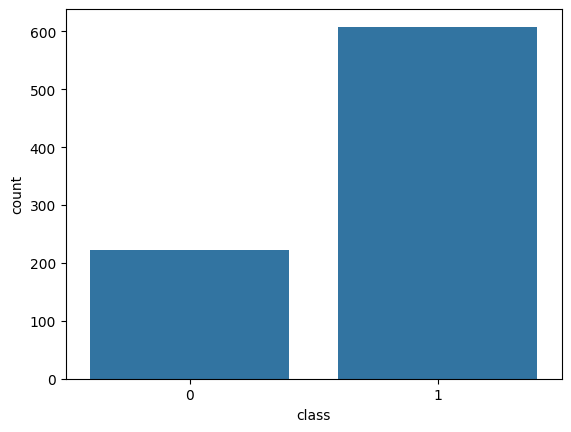

In [20]:
sns.countplot(x=df['class'])
plt.show()

In [21]:
x=df.drop('class',axis=1)
y=df['class']

In [22]:
sampler=RandomOverSampler(random_state=42)

x_sample,y_sample=sampler.fit_resample(x,y)

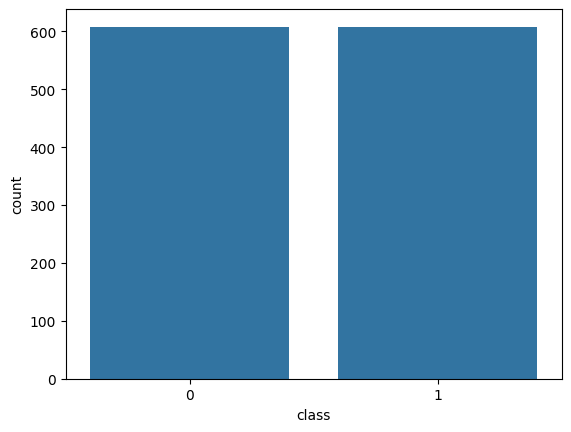

In [23]:
sns.countplot(x=y_sample)
plt.show()

In [24]:
x_sample.describe()

,duration,credit_amount,installment_commitment,other_parties,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
count,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000
mean,18.490132,2380.641447,3.095395,1.858553,2.796875,1.250822,33.890625,1.127467,1.404605,1.349507,1.148026,0.342928,0.971217
std,8.521089,1479.039326,1.082952,0.464077,1.097257,1.220706,9.775692,0.494615,0.578727,0.940388,0.355272,0.474883,0.167265
min,4.000000,250.000000,1.000000,0.000000,1.000000,0.000000,19.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,12.000000,1258.000000,2.000000,2.000000,2.000000,0.000000,26.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,18.000000,1977.000000,4.000000,2.000000,3.000000,1.000000,32.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,24.000000,3217.000000,4.000000,2.000000,4.000000,3.000000,40.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,42.000000,6967.000000,4.000000,2.000000,4.000000,3.000000,62.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000


In [44]:
def evaluation(y_test,y_pred,model,x_test=0,label=0):
    """This Function will take the y_test and y_pred as input and return the confusion matrix,
    classification report and accuracy score

    Args:
        y_test (_type_): Actual target values
        y_pred (_type_): Predicted target values
        x_test (_type_): Actual feature values
        model (_type_): Model used for prediction
        label (_type_): Label for the model
    """
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title('Actual VS. Predication')
    plt.xlabel("Predication")
    plt.ylabel("Actual")
    plt.show()
    
    print(classification_report(y_test,y_pred))
    

    yperd=model.decision_function(x_test)

    
    fpr,tpr,_=roc_curve(y_test,yperd)
    AUC=auc(fpr,tpr)
    
    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,linestyle='-',label=f'{label} (auc = %0.3f)'% AUC)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate --->")
    plt.ylabel('True Positive Rate --->')
    plt.legend()
    
    

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=42)

In [27]:
std=StandardScaler()
x_train_scaled=std.fit_transform(x_train)
x_test_scaled=std.transform(x_test)

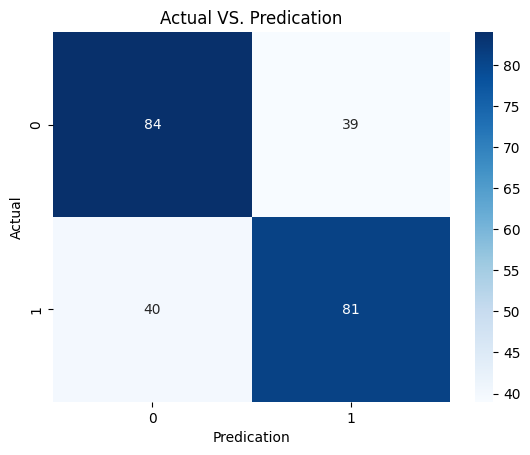

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       123
           1       0.68      0.67      0.67       121

    accuracy                           0.68       244
   macro avg       0.68      0.68      0.68       244
weighted avg       0.68      0.68      0.68       244



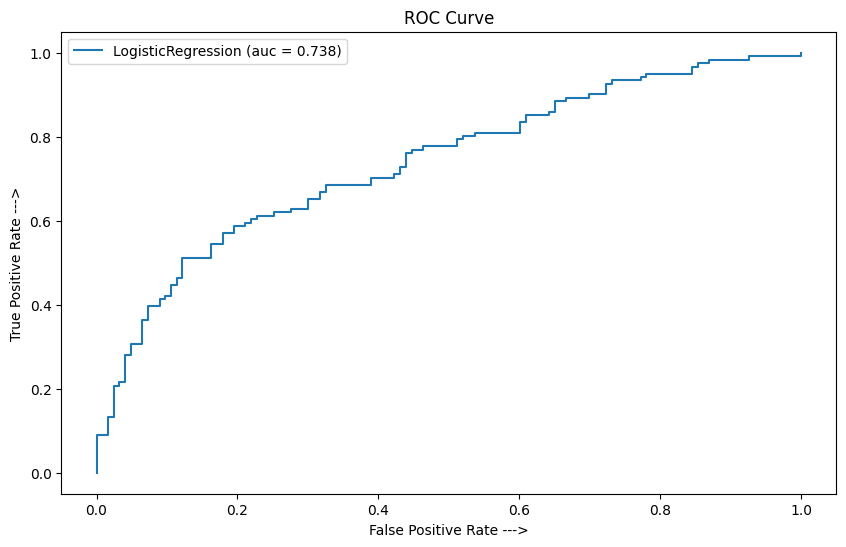

In [28]:
lr=LogisticRegression()

lr.fit(x_train_scaled,y_train)

y_pred=lr.predict(x_test_scaled)

evaluation(y_test=y_test,y_pred=y_pred,x_test=x_test_scaled,model=lr,label='LogisticRegression')

In [29]:
svm=SVC()

param={'C':[1,2,3,4],
       'gamma':[0.1,1],
       'kernel':['rbf'],
       'degree':[1,2,3,4]}

In [30]:
grid=GridSearchCV(svm,param,cv=5)
grid.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4], 'degree': [1, 2, 3, 4],
                         'gamma': [0.1, 1], 'kernel': ['rbf']})

In [31]:
grid.best_params_

{'C': 2, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

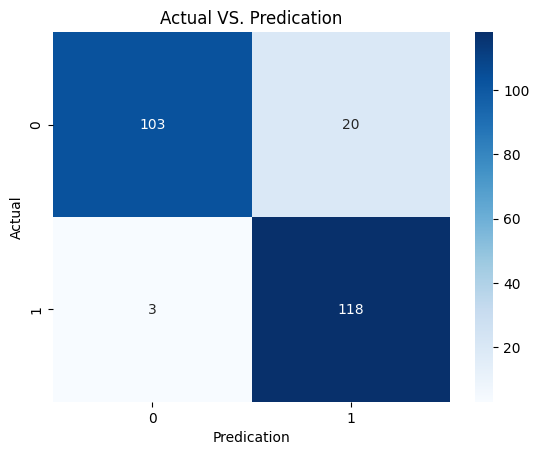

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       123
           1       0.86      0.98      0.91       121

    accuracy                           0.91       244
   macro avg       0.91      0.91      0.91       244
weighted avg       0.91      0.91      0.91       244



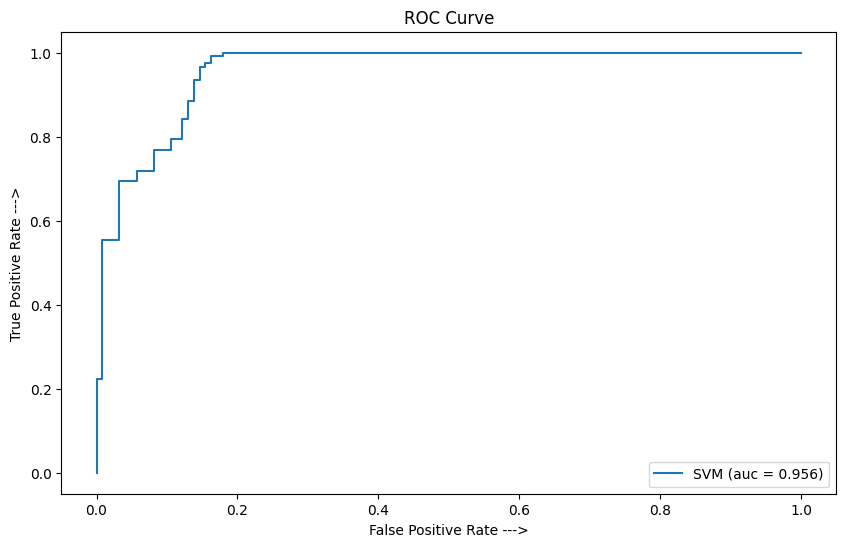

In [32]:
svm=SVC(C=2,kernel='rbf',gamma=0.1,degree=1)
svm.fit(x_train_scaled,y_train)
y_pred=svm.predict(x_test_scaled)
evaluation(y_test=y_test,y_pred=y_pred,x_test=x_test_scaled,model=svm,label='SVM')

In [33]:
model_knn=KNeighborsClassifier()

In [34]:
param_knn={'n_neighbors':[3,5,7,9],
           'p':[1,2],
           'weights':['distance','uniform']}

grid_knn=GridSearchCV(model_knn,param_knn,cv=5)
grid_knn.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['distance', 'uniform']})

In [35]:
grid_knn.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       123
           1       0.94      0.68      0.79       121

    accuracy                           0.82       244
   macro avg       0.85      0.82      0.82       244
weighted avg       0.85      0.82      0.82       244



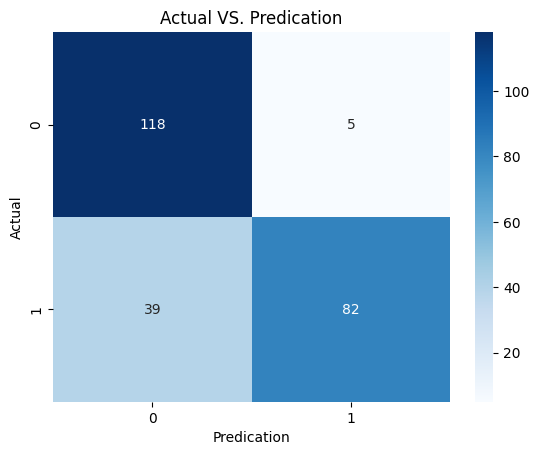

In [36]:
model_knn=KNeighborsClassifier(n_neighbors=5,p=2,weights='distance')
model_knn.fit(x_train_scaled,y_train)
y_pred=model_knn.predict(x_test_scaled)

print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Actual VS. Predication')
plt.xlabel("Predication")
plt.ylabel("Actual")
plt.show()


In [38]:
accuracy_rate=[]
for i in range(1,7):
    k_means=KMeans(n_clusters=i,random_state=42)
    k_means.fit(x_train_scaled,y_train)
    ypred=k_means.predict(x_test_scaled)
    accuracy_rate.append(accuracy_score(y_test,ypred))

In [39]:
accuracy_rate

[0.5040983606557377,
 0.5450819672131147,
 0.35655737704918034,
 0.3524590163934426,
 0.3483606557377049,
 0.3237704918032787]

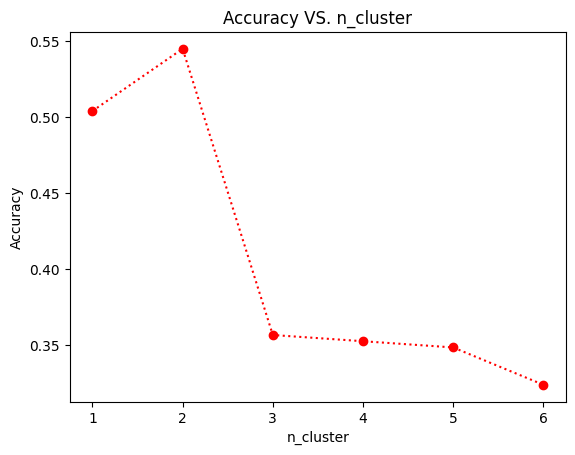

In [41]:
plt.plot(range(1,7),accuracy_rate,'o:r')
plt.title("Accuracy VS. n_cluster")
plt.xlabel("n_cluster")
plt.ylabel("Accuracy")
plt.show()

In [46]:
k_means=KMeans(n_clusters=2,random_state=42)
k_means.fit(x_train_scaled,y_train)
ypred=k_means.predict(x_test_scaled)


              precision    recall  f1-score   support

           0       0.55      0.57      0.56       123
           1       0.54      0.52      0.53       121

    accuracy                           0.55       244
   macro avg       0.54      0.54      0.54       244
weighted avg       0.55      0.55      0.54       244



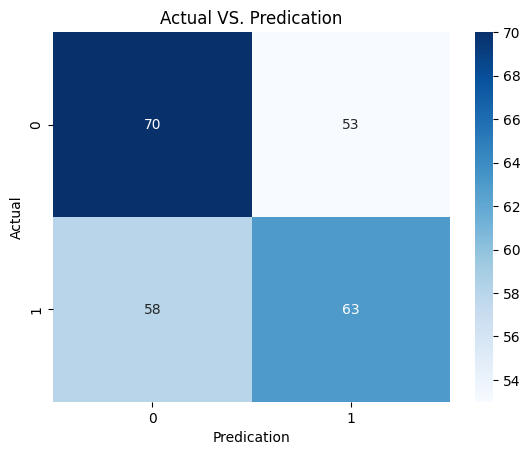

In [47]:
print(classification_report(y_test,ypred))

cm=confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Actual VS. Predication')
plt.xlabel("Predication")
plt.ylabel("Actual")
plt.show()